### Property Prices in the city of Banglore, India
+ This notebook is an exercise to examine the prices per square unit of the houses in Banglore city
+ The dataset has several columns but for this exercise, I focus on the price_per_sqft column to do some Feature Engineering operations as follows
    1. Identify and remove outliers using the percentile(upper and lower bounds)
    2. Create a new DataFrame that has no outliers
    3. Remove outliers using 3 standard deviation on the dataframe in step 2
    4. Create a new dataframe
    5. Remove outliers using zscore of 3 on the dataframe in step 2
    6. Plot boxplots to visualise any ouliers on the old and new DataFrames
    7. Plot histograms for new DataFrame that is generated and also plot a bell curve on the same curve

In [43]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('data/bhp.csv')
df.shape

(13200, 7)

In [5]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [47]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [48]:
df['price_per_sqft'].min()

267

In [51]:
df['price_per_sqft'].max()

12000000

- The max value **12000000** is way too large and seems like a mistake

In [50]:
df['price_per_sqft'].median()

5438.0

In [49]:
df['price_per_sqft'].mean()

7920.336742424242

#### boxblot to visualise the outliers

<Axes: ylabel='price_per_sqft'>

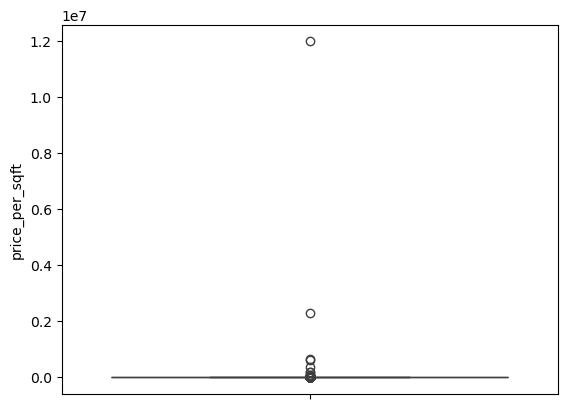

In [7]:
sns.boxplot(df['price_per_sqft'])


#### histogram  plot

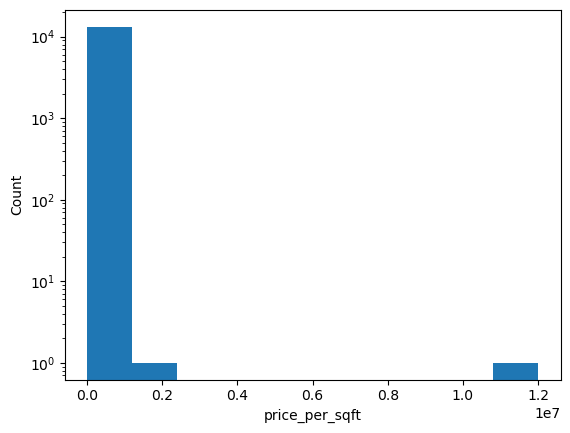

In [132]:
plt.hist(df['price_per_sqft'])
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

<Axes: xlabel='price_per_sqft', ylabel='Count'>

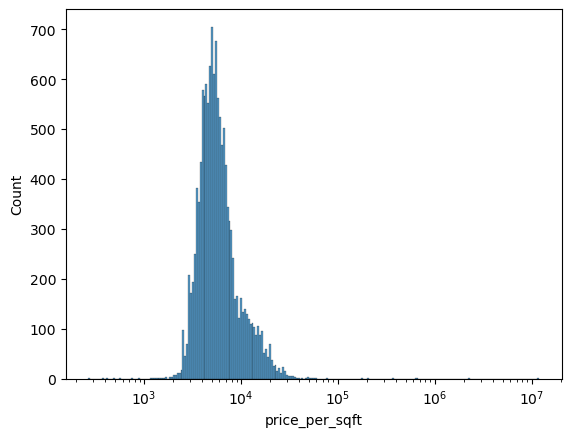

In [130]:
sns.histplot(df['price_per_sqft'],log_scale=True)

#### the minimum and maximum threshold using quantile

In [54]:
def detect_outliers(column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    return lower_bound,upper_bound

print(detect_outliers('price_per_sqft'))

(-308.0, 11892.0)


#### identify the number of outliers in the data set

In [34]:
q1=df['price_per_sqft'].quantile(0.25)
q3=df['price_per_sqft'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df1=df[(df['price_per_sqft']<lower_bound)|(df['price_per_sqft']>upper_bound)]
df1.shape

(1265, 7)

#### generate a new DataFrame that has no outliers

In [55]:
df2=df[(df['price_per_sqft']>lower_bound)&(df['price_per_sqft']<upper_bound)]
df2.shape

(11935, 7)

In [56]:
# how many rows are outliers
df.shape[0]-df2.shape[0]

1265

In [24]:
df2['price_per_sqft'].describe()

count    11935.000000
mean      5575.925513
std       1957.779783
min        267.000000
25%       4166.000000
50%       5188.000000
75%       6603.000000
max      11875.000000
Name: price_per_sqft, dtype: float64

<Axes: ylabel='price_per_sqft'>

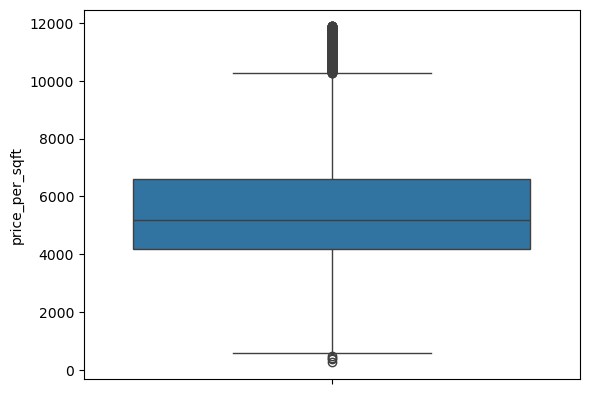

In [25]:
sns.boxplot(df2['price_per_sqft'])

<Axes: xlabel='price_per_sqft', ylabel='Count'>

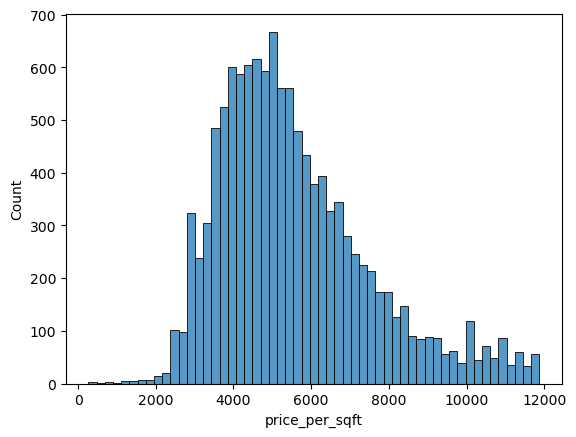

In [26]:
sns.histplot(df2['price_per_sqft'])

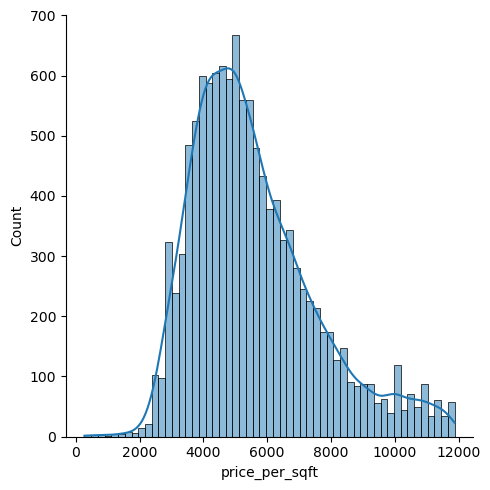

In [72]:
sns.displot(df2['price_per_sqft'],kde=True)

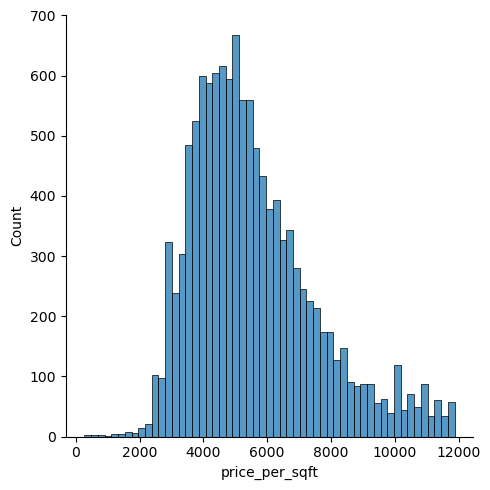

In [77]:
sns.displot(df2['price_per_sqft'])

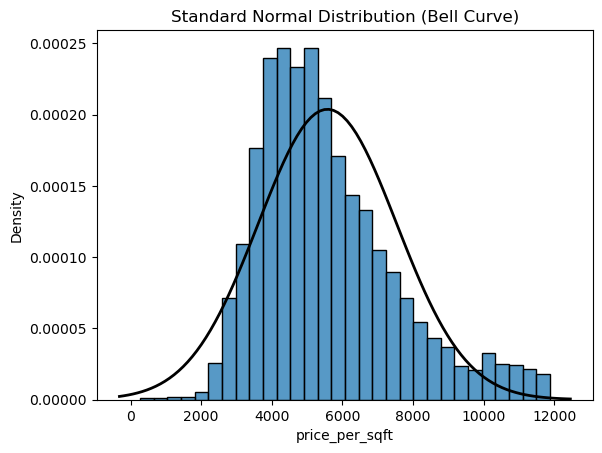

In [80]:
from scipy.stats import norm

sns.histplot(data=df2['price_per_sqft'], kde=False, stat='density', bins=30) 

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, df2['price_per_sqft'].mean(), df2['price_per_sqft'].std())
plt.plot(x, p, 'k', linewidth=2)

plt.title('Standard Normal Distribution (Bell Curve)')
plt.show()

#### detecting outliers using standard deviation on DataFrame **df2**

In [113]:
price_mean=df2['price_per_sqft'].mean()
price_std=df2['price_per_sqft'].std()

upper_limit=price_mean+3*price_std
lower_limit=price_mean-3*price_std
df2[(df2['price_per_sqft']<lower_limit)|(df2['price_per_sqft']>upper_limit)].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
608,other,6 Bedroom,2160.0,5.0,250.0,6,11574
676,Brookefield,3 Bedroom,1200.0,3.0,140.0,3,11666
951,Rajaji Nagar,3 BHK,1725.0,3.0,200.0,3,11594
1092,Kengeri,7 Bedroom,1200.0,6.0,140.0,7,11666
1108,Hosakerehalli,4 BHK,3205.0,5.0,380.0,4,11856


In [124]:
df2[(df2['price_per_sqft']<lower_limit)|(df2['price_per_sqft']>upper_limit)].shape[0]

91

#### generate a new dataframe with no outliers

In [114]:
df3=df2[(df2['price_per_sqft']>lower_limit)&(df2['price_per_sqft']<upper_limit)]
df3.shape

(11844, 7)

In [115]:
# how many rows are outliers
df.shape[0]-df3.shape[0]

1356

#### boxplot visualisation

<Axes: ylabel='price_per_sqft'>

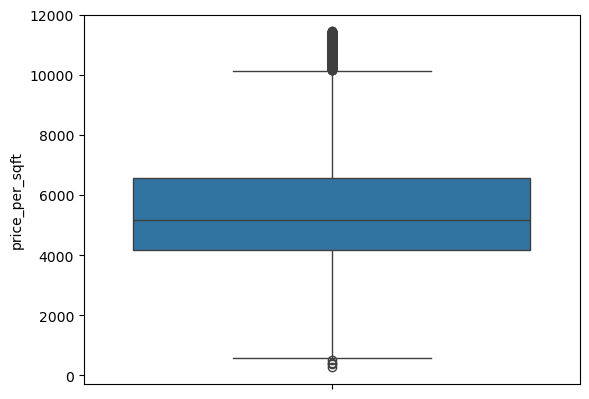

In [116]:
sns.boxplot(df3['price_per_sqft'])

<Axes: xlabel='price_per_sqft', ylabel='Count'>

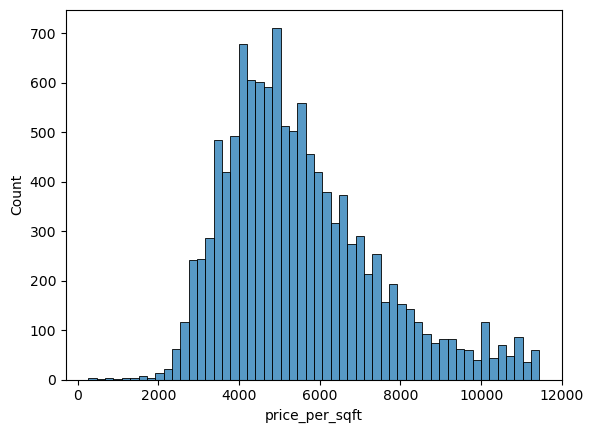

In [117]:
sns.histplot(df3['price_per_sqft'])

#### detect outlier using z-score on DataFrame **df2**

In [118]:
price_mean=df2['price_per_sqft'].mean()
price_std=df2['price_per_sqft'].std()

z_score=(df2['price_per_sqft']-price_mean)/price_std
df4=df2.copy()
df4['price_z_score']=z_score
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,price_z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.958701
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.490824
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.649167
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,0.341752
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.677260


In [119]:
df4[(df4['price_z_score']<-3)|(df4['price_z_score']>3)].shape

(91, 8)

#### remove outliers using z-score and generate a new dataframe

In [120]:
df5=df4[(df4['price_z_score']>-3)&(df4['price_z_score']<3)]
df5.shape[0]

11844

In [121]:
df.shape[0]-df5.shape[0]

1356

In [122]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,price_z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.958701
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.490824
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.649167
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,0.341752
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.677260


<Axes: ylabel='price_per_sqft'>

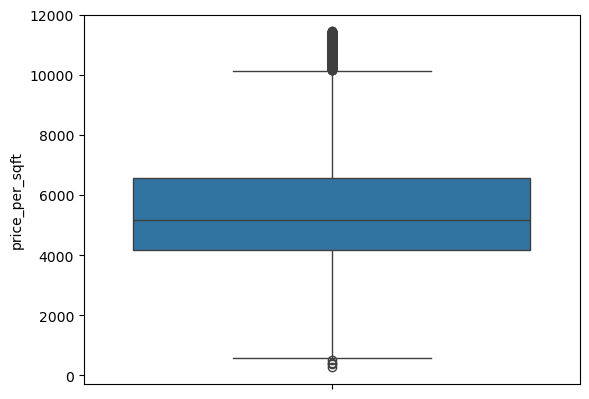

In [123]:
sns.boxplot(df5['price_per_sqft'])

<Axes: xlabel='price_per_sqft', ylabel='Count'>

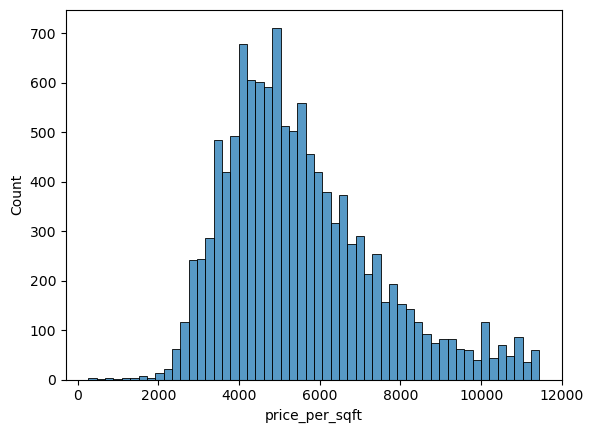

In [126]:
sns.histplot(df5['price_per_sqft'])